In [383]:
import pyflann
exec(open("../database.py").read())
exec(open("../helperFunctions.py").read())
import numpy as np
import timeit
from ast import literal_eval

In [384]:
name = 'mnist-784'
runs = 1
metric = 'euclidean'
queries = 1000
nameFull = name + '-' + metric + '-true-labels.xlsx'
datasetTrainImages, datasetTestImages, _ = get_ann_benchmark_data(name)

('trainDataset : ', (60000, 784))
('testDataset : ', (10000, 784))


***Create FLANN Index***

In [385]:
def createIndex(indexMethod, datasetImages):
    index = indexMethod.FLANN()  
    num_trees = 2048   
    time_start = timeit.default_timer()
    index.build_index(datasetImages, algorithm='kdtree', trees=num_trees)
    time_end = timeit.default_timer()
    totalTime = (time_end - time_start)
    return (index, totalTime)

In [386]:
(minBuildTime, maxBuildTime, indexedStruct) = createIndexNumerous(createIndex, pyflann, datasetTrainImages, runs)
print('minBuildTime : ', minBuildTime)
print('maxBuildTime : ', maxBuildTime)

('index ', 1, ' created')
('minBuildTime : ', 827.044)
('maxBuildTime : ', 827.044)


In [387]:
def measureTime(par, indexes, distances, datasetImages):
    totalTime = 0
    for i in range(par) : 
        xq = datasetImages[i:i+1].astype('float32') # Use the first image as the query vector
        # xq = xq.flatten().tolist()
        time_start = timeit.default_timer()
        index, distance = indexedStruct.nn_index(xq, 100)
        time_end = timeit.default_timer()
        totalTime += (time_end - time_start)
        indexes.append(index[0])
        distances.append(np.sqrt(distance[0]))
    return np.round(totalTime, 3)

In [388]:
(minSearchTime, maxSearchTime, indexes, distances) = measureTimeNumerous(measureTime, runs, queries, datasetTestImages)
print('minSearchTime : ', minSearchTime)
print('maxSearchTime : ', maxSearchTime)

('search ', 1, ' done')
('minSearchTime : ', 2.252)
('maxSearchTime : ', 2.252)


In [389]:
indexes = np.array(indexes)
distances = np.round(np.array(distances).astype(float), 4)

In [390]:
print('indexes : ', indexes.shape)
print('distances : ', distances.shape)

('indexes : ', (1000, 100))
('distances : ', (1000, 100))


In [391]:
path = '../datasets/'+nameFull
(trueIndexes, trueDistances) = readDB(path)

('trueIndexes : ', (1000, 100))
('trueDistances : ', (1000, 100))


In [392]:
amount = 50
compareElems(amount, indexes, distances, trueIndexes, trueDistances)

53843 || 53843
676.584 || 676.584
38620 || 38620
793.9868 || 793.9868
16186 || 16186
862.6766 || 862.6766
27059 || 27059
864.5039 || 864.5039
47003 || 47003
894.7 || 894.7
14563 || 14563
909.7043 || 909.7043
44566 || 44566
917.6323 || 917.6323
15260 || 15260
921.6241 || 921.6241
40368 || 40368
922.147 || 922.147
36395 || 36395
943.4972 || 943.4972
14770 || 30502
970.4216 || 954.8581
17228 || 14770
1005.5889 || 970.4216
35919 || 17228
1009.3607 || 1005.5889
14505 || 35919
1028.6029 || 1009.3607
55668 || 27166
1039.1915 || 1010.2643
9724 || 21518
1047.6316 || 1017.5667
40710 || 52010
1064.2528 || 1020.4876
29762 || 38763
1067.1205 || 1023.5209
26957 || 14505
1067.4825 || 1028.6029
35937 || 48108
1074.6162 || 1029.6101
23149 || 9444
1079.0852 || 1034.7782
51420 || 55668
1086.4801 || 1039.1915
1673 || 9724
1095.8595 || 1047.6316
50255 || 57204
1096.6759 || 1052.1445
4130 || 17946
1097.2963 || 1058.9651
30988 || 41958
1097.5536 || 1061.7175
32980 || 40710
1098.7784 || 1064.2528
25972 || 297

In [393]:
calculateRecallAverage(indexes, distances, trueIndexes, trueDistances)
calculateRecallAverage(indexes, distances, trueIndexes, trueDistances, 1.01)
calculateRecallAverage(indexes, distances, trueIndexes, trueDistances, 1.1)
calculateNormRecall(indexes,trueIndexes)

Recall@1: 0.0799
Recall@1.01: 0.1264
Recall@1.1: 0.5277
42
norm Recall is 0.4129


0.4129

In [394]:
print(indexes[0]) # will find the 100 nearest neighbors

[53843 38620 16186 27059 47003 14563 44566 15260 40368 36395 14770 17228
 35919 14505 55668  9724 40710 29762 26957 35937 23149 51420  1673 50255
  4130 30988 32980 25972 25705 43917 15856  6475 47117 22546 50147  6525
 47015 58507 51916 15570 46053  1789 24907 58526 24228 53839  3283  6435
 15062 50115 36964 48889 29482 58890  7092 13754 18757 39676 30912 37298
 35130 18367  6579 58078 56542 23153 53962 43798 34344 58214 46686 42824
 11329 58733 18691 10063 12031 45466 11786  2348 52750  3236 23207 49862
 44175 46264 51560 45937  3059 48250 59088 27577 53779  9082 19416 39863
 58583 18204   934 33609]


('index : ', 53843, '\ndistance : ', 676.584)
('index : ', 38620, '\ndistance : ', 793.9868)
('index : ', 16186, '\ndistance : ', 862.6766)
('index : ', 27059, '\ndistance : ', 864.5039)
('index : ', 47003, '\ndistance : ', 894.7)
('index : ', 14563, '\ndistance : ', 909.7043)
('index : ', 44566, '\ndistance : ', 917.6323)
('index : ', 15260, '\ndistance : ', 921.6241)
('index : ', 40368, '\ndistance : ', 922.147)
('index : ', 36395, '\ndistance : ', 943.4972)


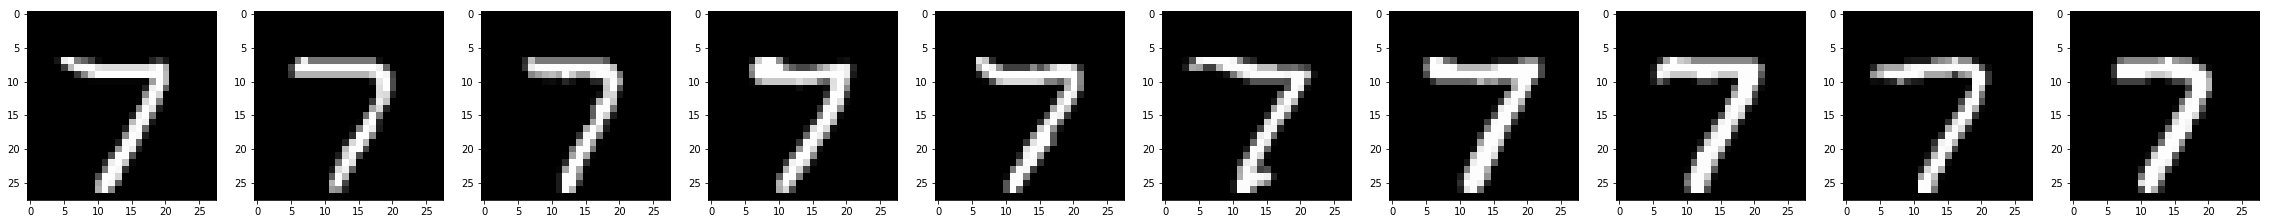

In [395]:
draw_mnist(indexes, distances, datasetTrainImages)